# Demo of SNPmanifold

In [ ]:
# If you want to use cuda

import torch
torch.set_default_device('cuda')
torch.cuda.set_device('cuda:0')

2024-05-29 04:51:57.969575: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Start loading raw data.
Finish loading raw data.
Start filtering low-quality cells and SNPs.


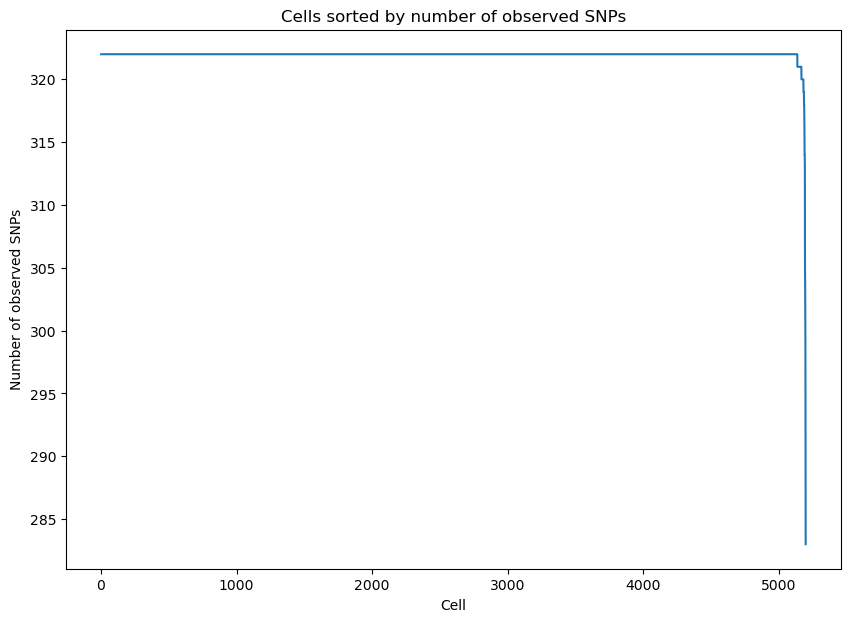

Please determine y-axis threshold in the plot to filter low-quality cells with low number of observed SNPs.   0


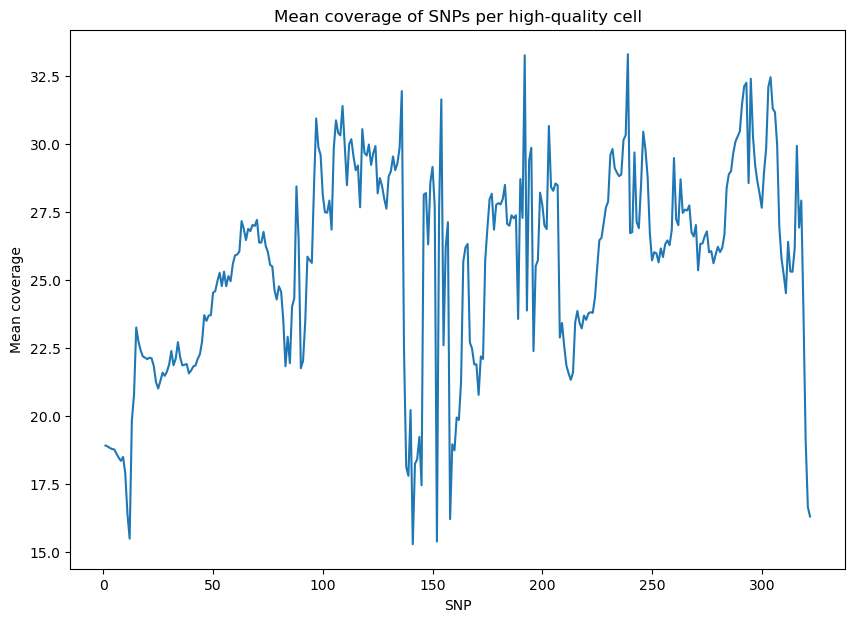

Please determine y-axis threshold in the plot to filter low-quality SNPs with low coverage.   0


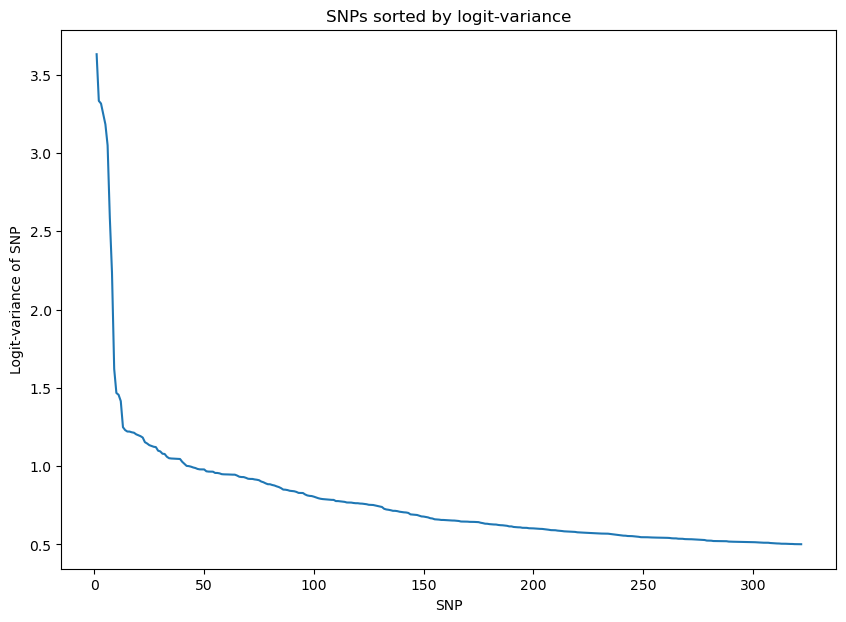

Please determine y-axis threshold in the plot to filter low-quality SNPs with low logit-variance.   0
Finish filtering low-quality data, 5199 cells and 322 SNPs will be used for downstream analysis.
Start training VAE.
Epoch[10/2000], Cost: 4.655486
Epoch[20/2000], Cost: 3.267751
Epoch[30/2000], Cost: 3.202242
Epoch[40/2000], Cost: 3.183665
Epoch[50/2000], Cost: 3.170403
Epoch[60/2000], Cost: 3.161230
Epoch[70/2000], Cost: 3.151510
Epoch[80/2000], Cost: 3.143412
Epoch[90/2000], Cost: 3.136227
Epoch[100/2000], Cost: 3.129611
Epoch[200/2000], Cost: 3.093110
Epoch[300/2000], Cost: 3.071827
Epoch[400/2000], Cost: 3.052272
Epoch[500/2000], Cost: 3.032630
Epoch[600/2000], Cost: 3.013380
Epoch[700/2000], Cost: 2.994563
Epoch[800/2000], Cost: 2.975909
Epoch[900/2000], Cost: 2.957331
Epoch[1000/2000], Cost: 2.938742
Epoch[1100/2000], Cost: 2.920131
Epoch[1200/2000], Cost: 2.901630
Epoch[1300/2000], Cost: 2.883499
Epoch[1400/2000], Cost: 2.866161
Epoch[1500/2000], Cost: 2.849954
Epoch[1600/2000]

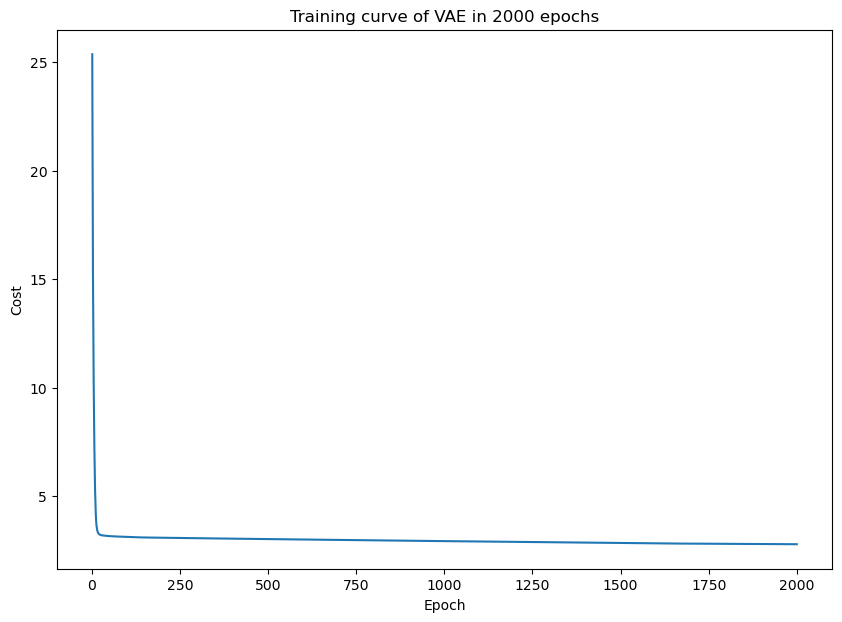

Start learning PCA and UMAP of latent space in VAE.
Finish learning, PCA and UMAP of latent space will be shown below.


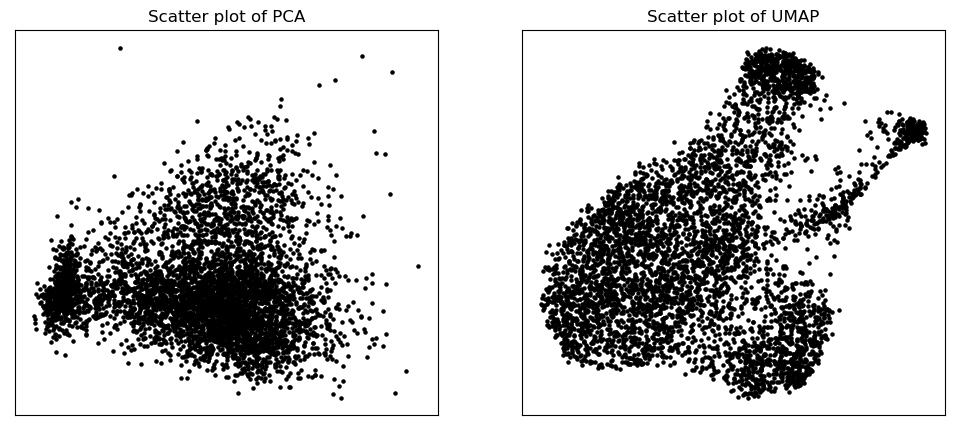

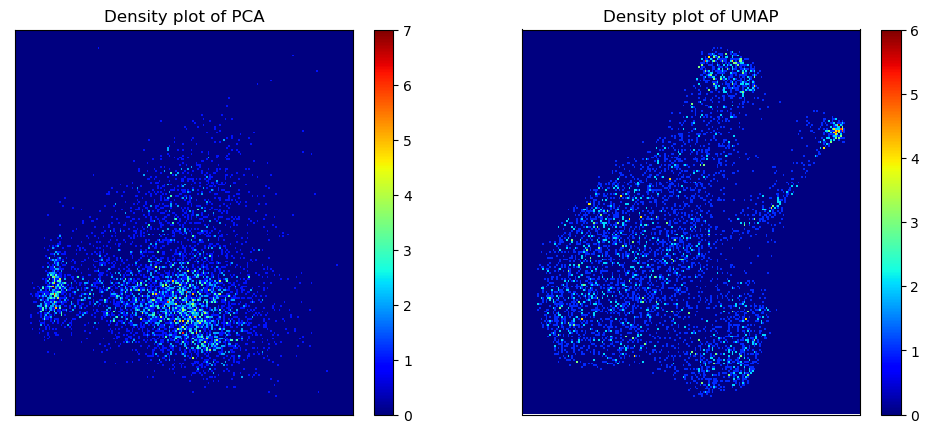

Start clustering.
2 clusters, Distortion: 10665.348633
3 clusters, Distortion: 7475.152832
4 clusters, Distortion: 5719.106445
5 clusters, Distortion: 4184.863770
6 clusters, Distortion: 3516.770996
7 clusters, Distortion: 2997.443848
8 clusters, Distortion: 2679.255859
9 clusters, Distortion: 2475.684570
10 clusters, Distortion: 2221.145020
11 clusters, Distortion: 1979.297119
12 clusters, Distortion: 1944.364014
13 clusters, Distortion: 1685.515137
14 clusters, Distortion: 1608.059326
15 clusters, Distortion: 1576.882080
16 clusters, Distortion: 1452.074219
17 clusters, Distortion: 1386.300171
18 clusters, Distortion: 1343.507324
19 clusters, Distortion: 1266.687256
20 clusters, Distortion: 1237.325684
Finish clustering, PCA, UMAP, distortion, silhouette score of K-means clustering will be shown below.


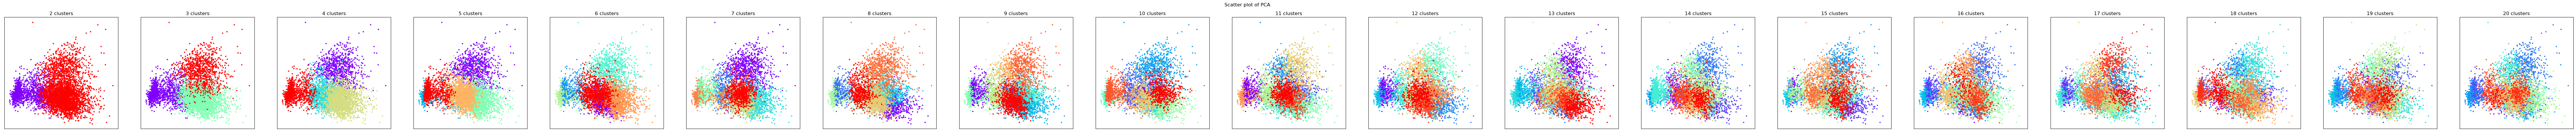

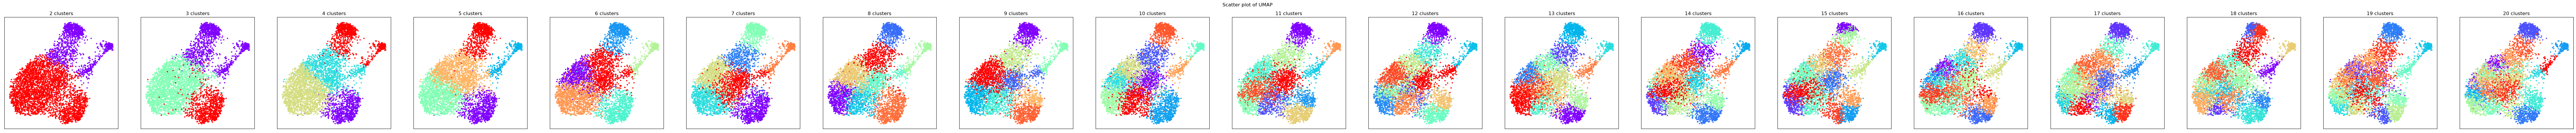

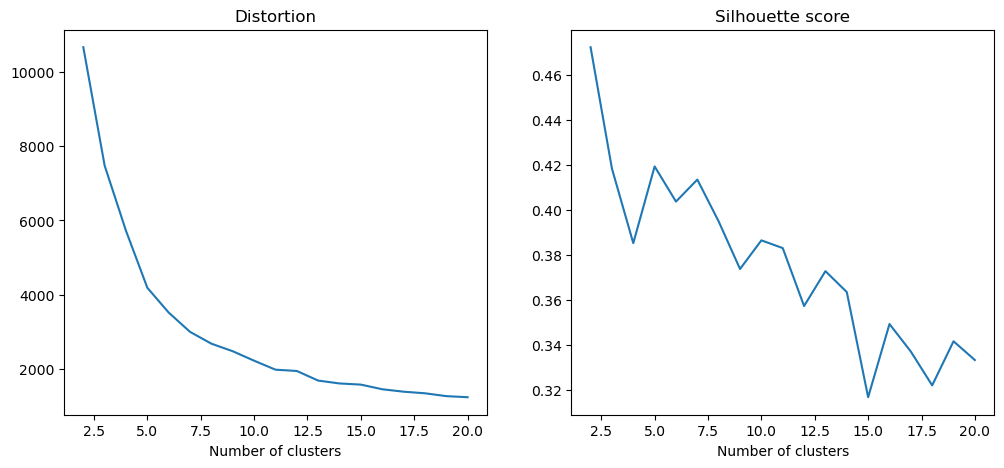

In [1]:
# This demo dataset is available at data/MKN45_filtered in this GitHub repository.
# Import SNPmanifold and create an object of the class SNP_VAE.
# Run 1. filtering, 2. training, 3. clustering, 4. phylogeny in order.
# Each step can rerun sperately without reruning prior steps.

import SNPmanifold

# demo1 = SNPmanifold.SNP_VAE(path = "../../../../MKN45_filtered") <- output path of cellSNP-lite
# demo1 = SNPmanifold.SNP_VAE(AD = "cellSNP.tag.AD.mtx", DP = "cellSNP.tag.DP.mtx", VCF = "cellSNP.base.vcf.gz")
# demo1 = SNPmanifold.SNP_VAE(AD = "cellSNP.tag.AD.mtx", DP = "cellSNP.tag.DP.mtx", variant_name = "variant_name.tsv")

demo1 = SNPmanifold.SNP_VAE(AD = "/home/u3570318/mount2/SNPmanifold/data/MKN45_filtered/cellSNP.tag.AD.mtx", DP = "/home/u3570318/mount2/SNPmanifold/data/MKN45_filtered/cellSNP.tag.DP.mtx", variant_name = "/home/u3570318/mount2/SNPmanifold/data/MKN45_filtered/variant_name.tsv")
demo1.filtering()
demo1.training(is_cuda = True) # set is_cuda to False if you use CPU.
demo1.clustering(algorithm = "kmeans_umap3d", max_cluster = 20)

PCA and UMAP of individual clusters will be shown below.


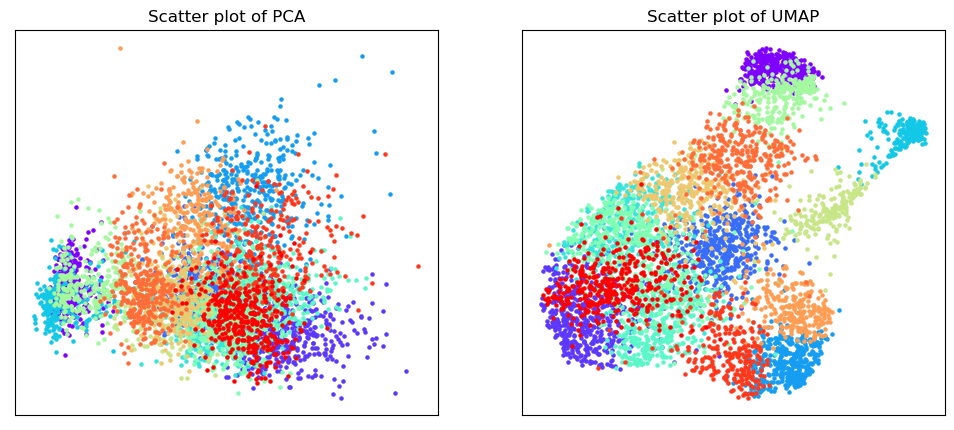

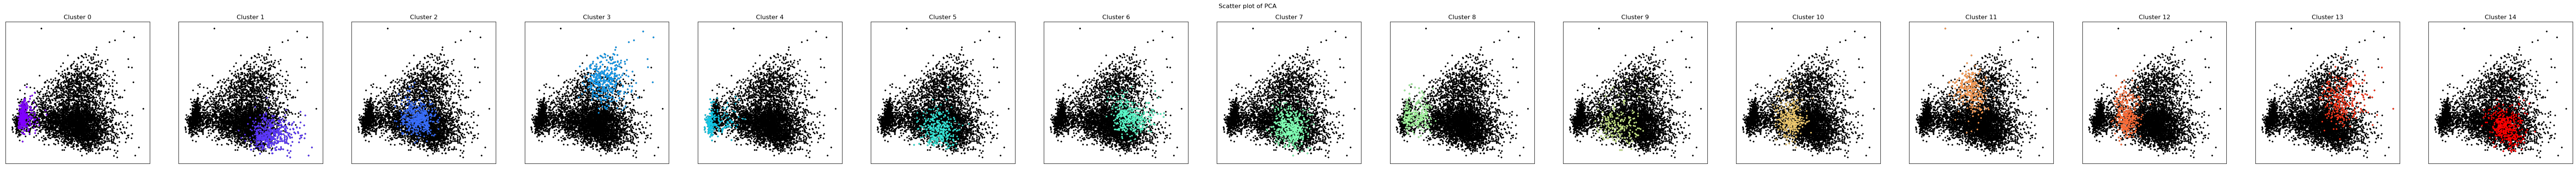

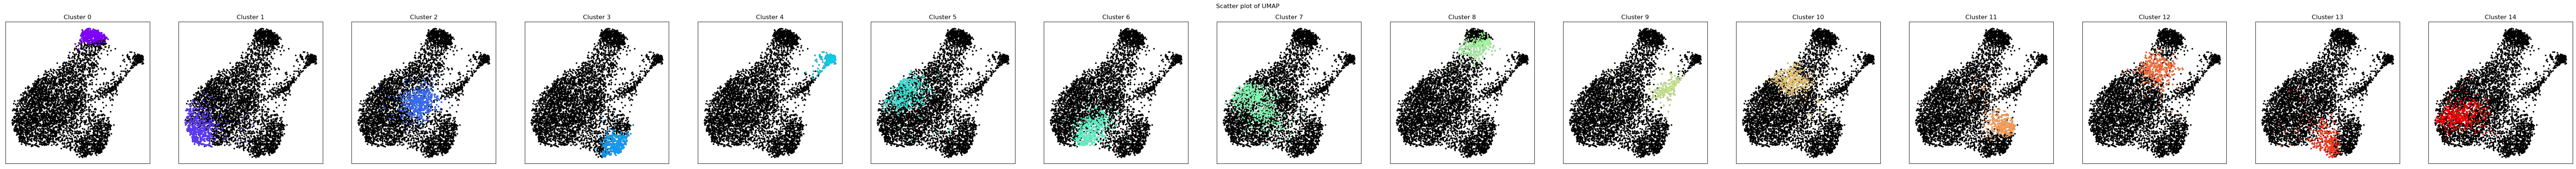

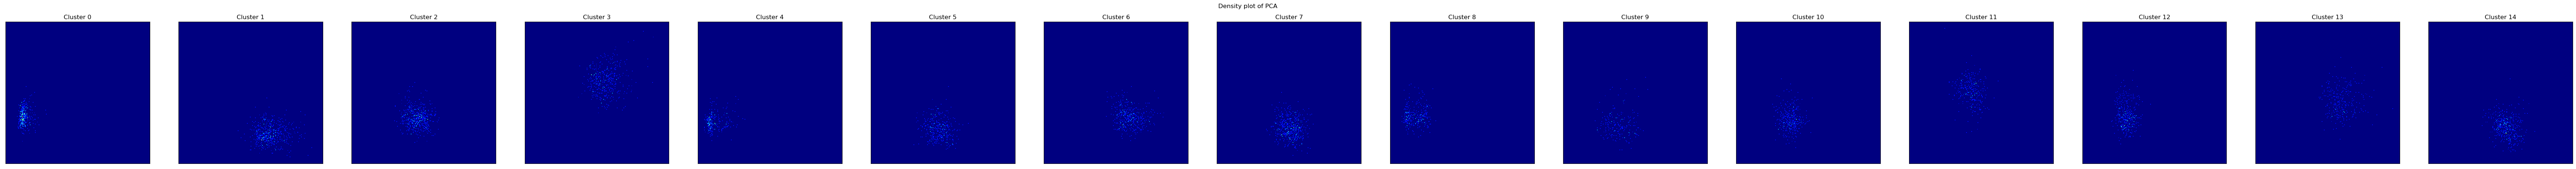

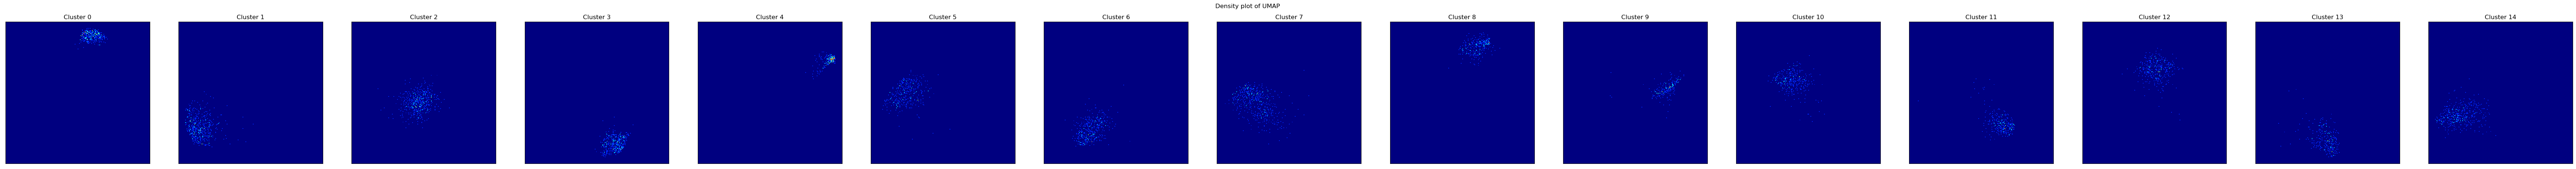

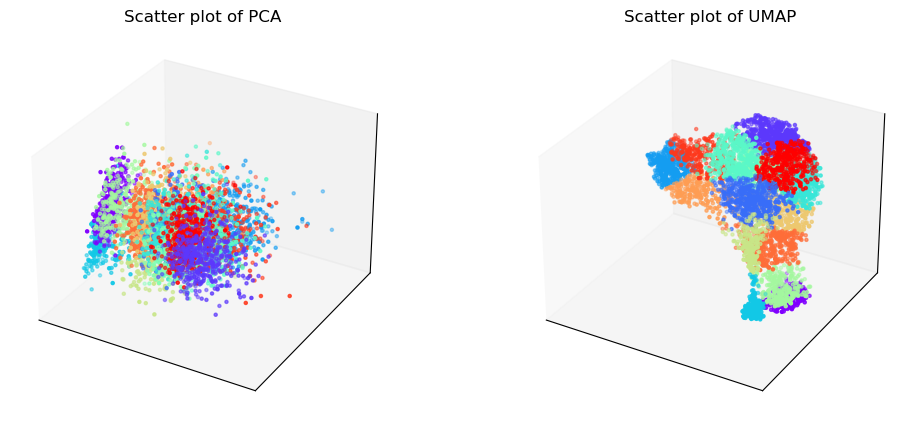

Phylogenetic tree in latent space will be shown below.


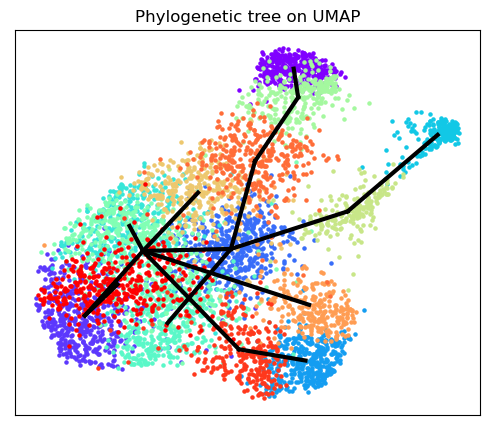

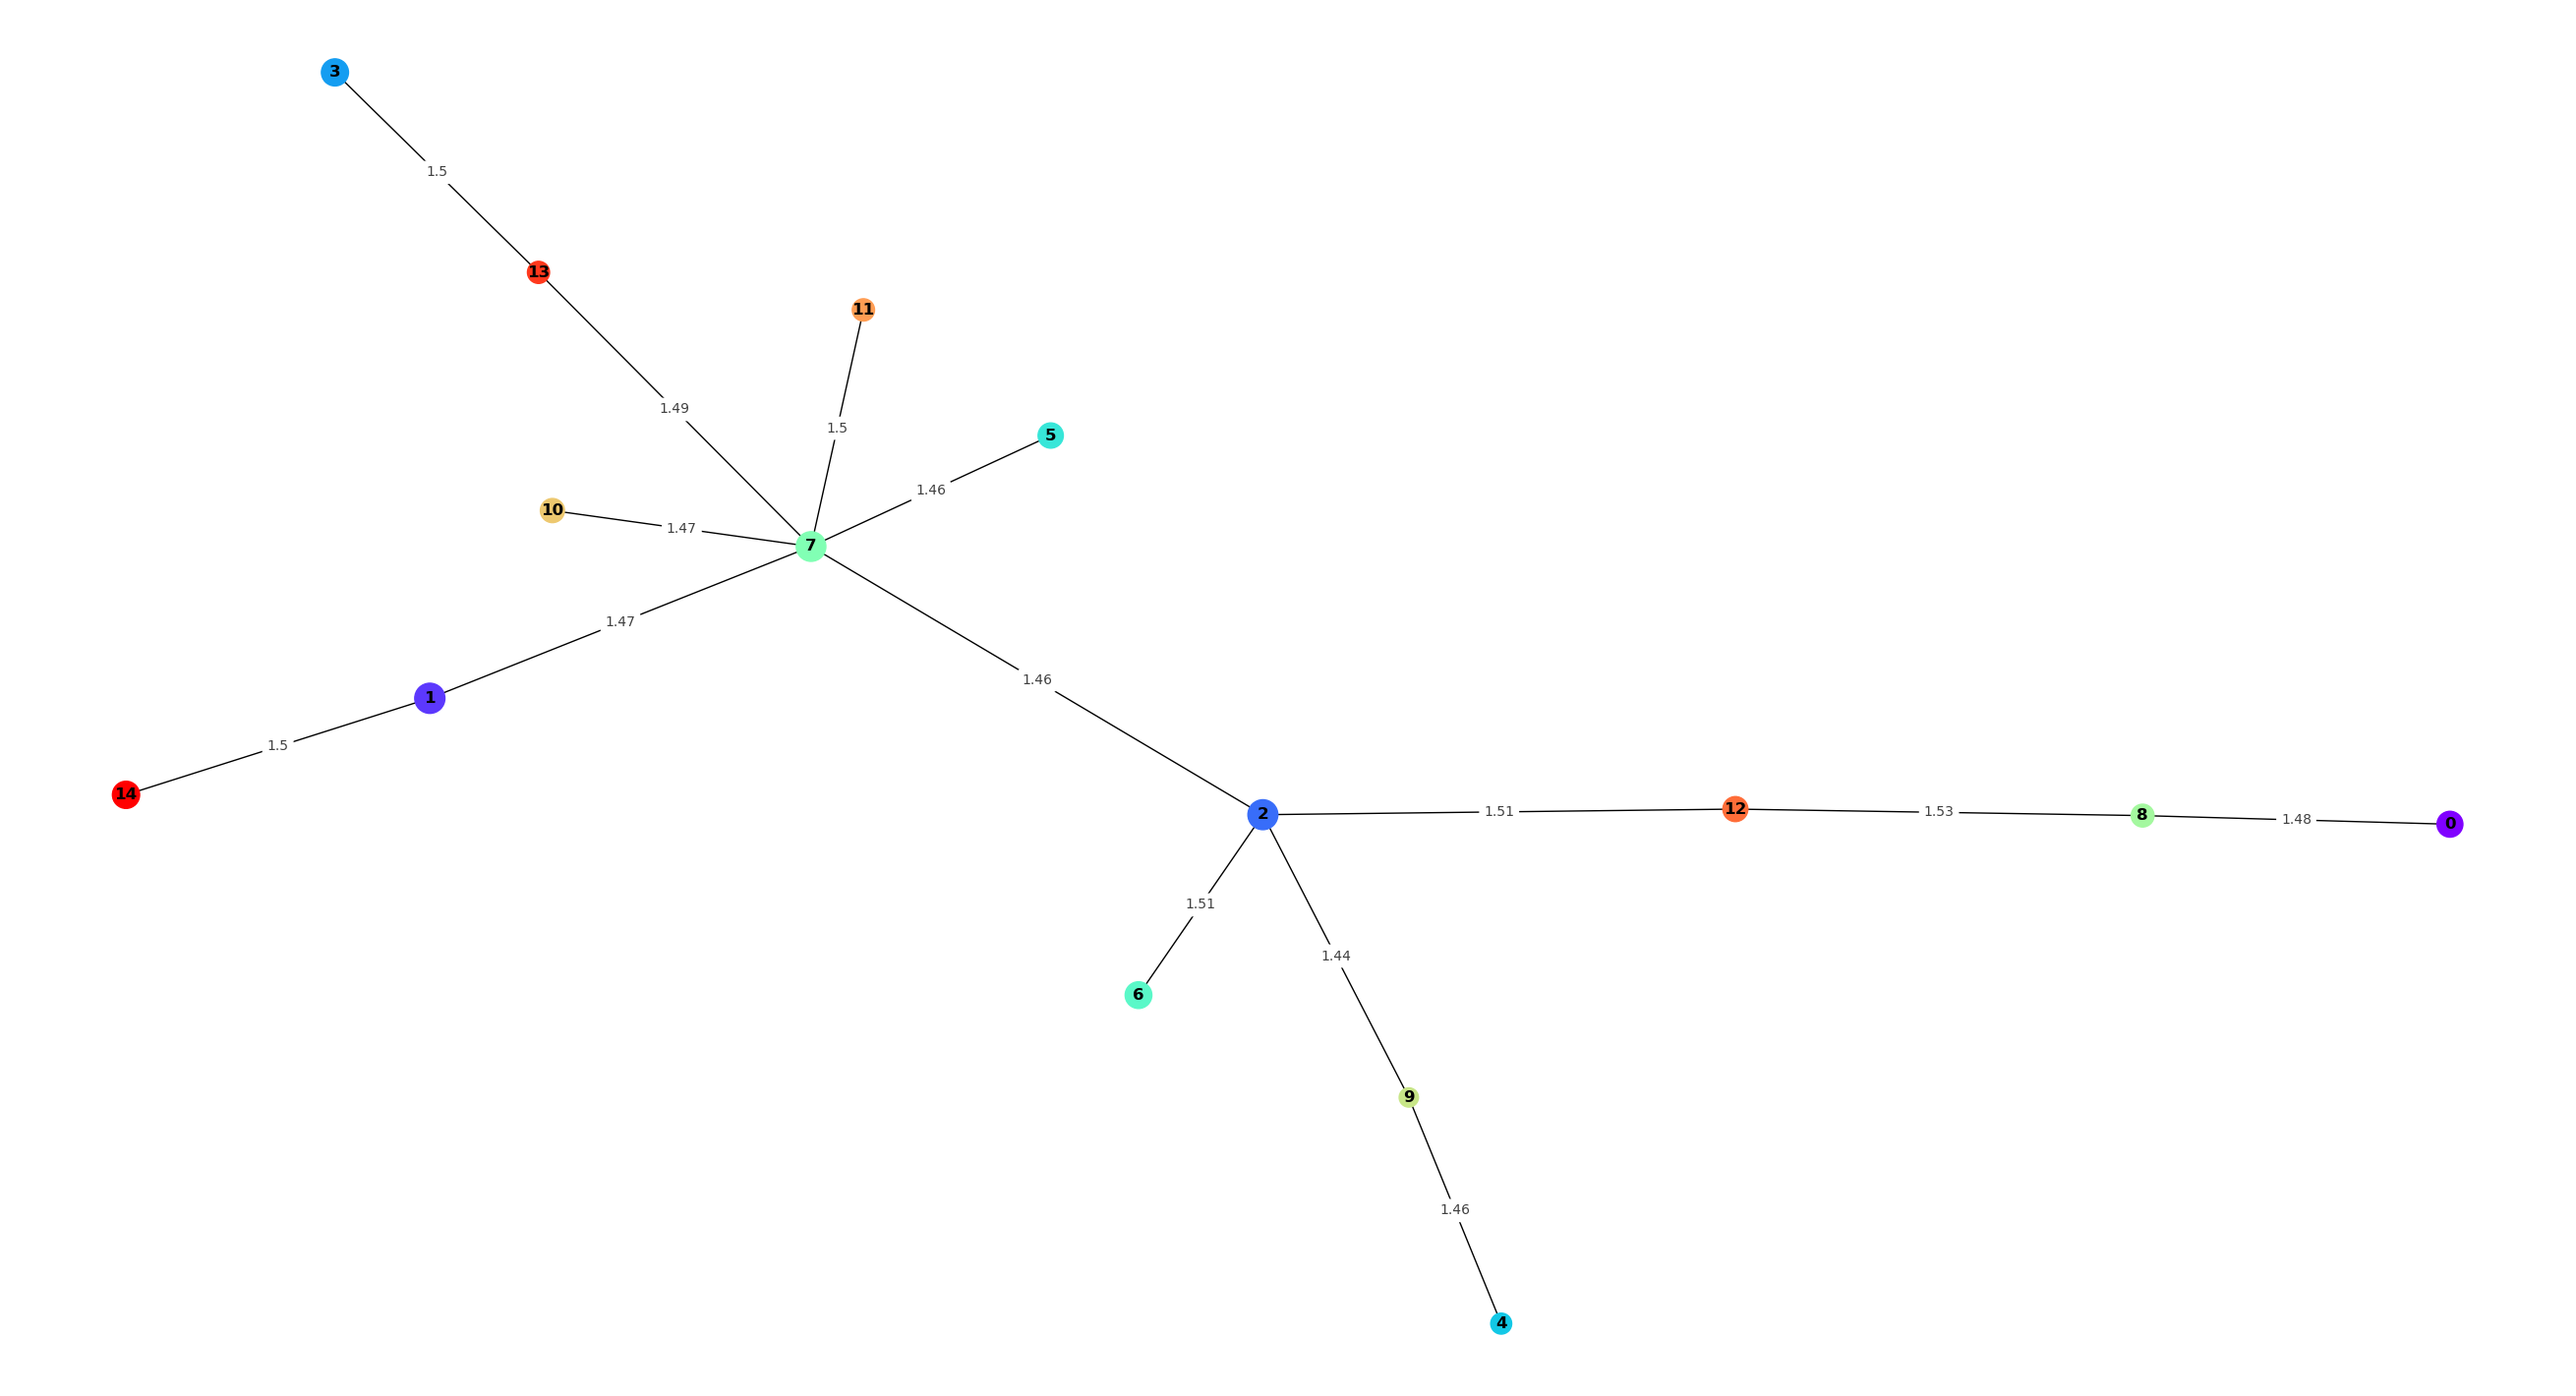

SNP-allelic ratios of 5199 cells and 50 SNPs will be shown below.


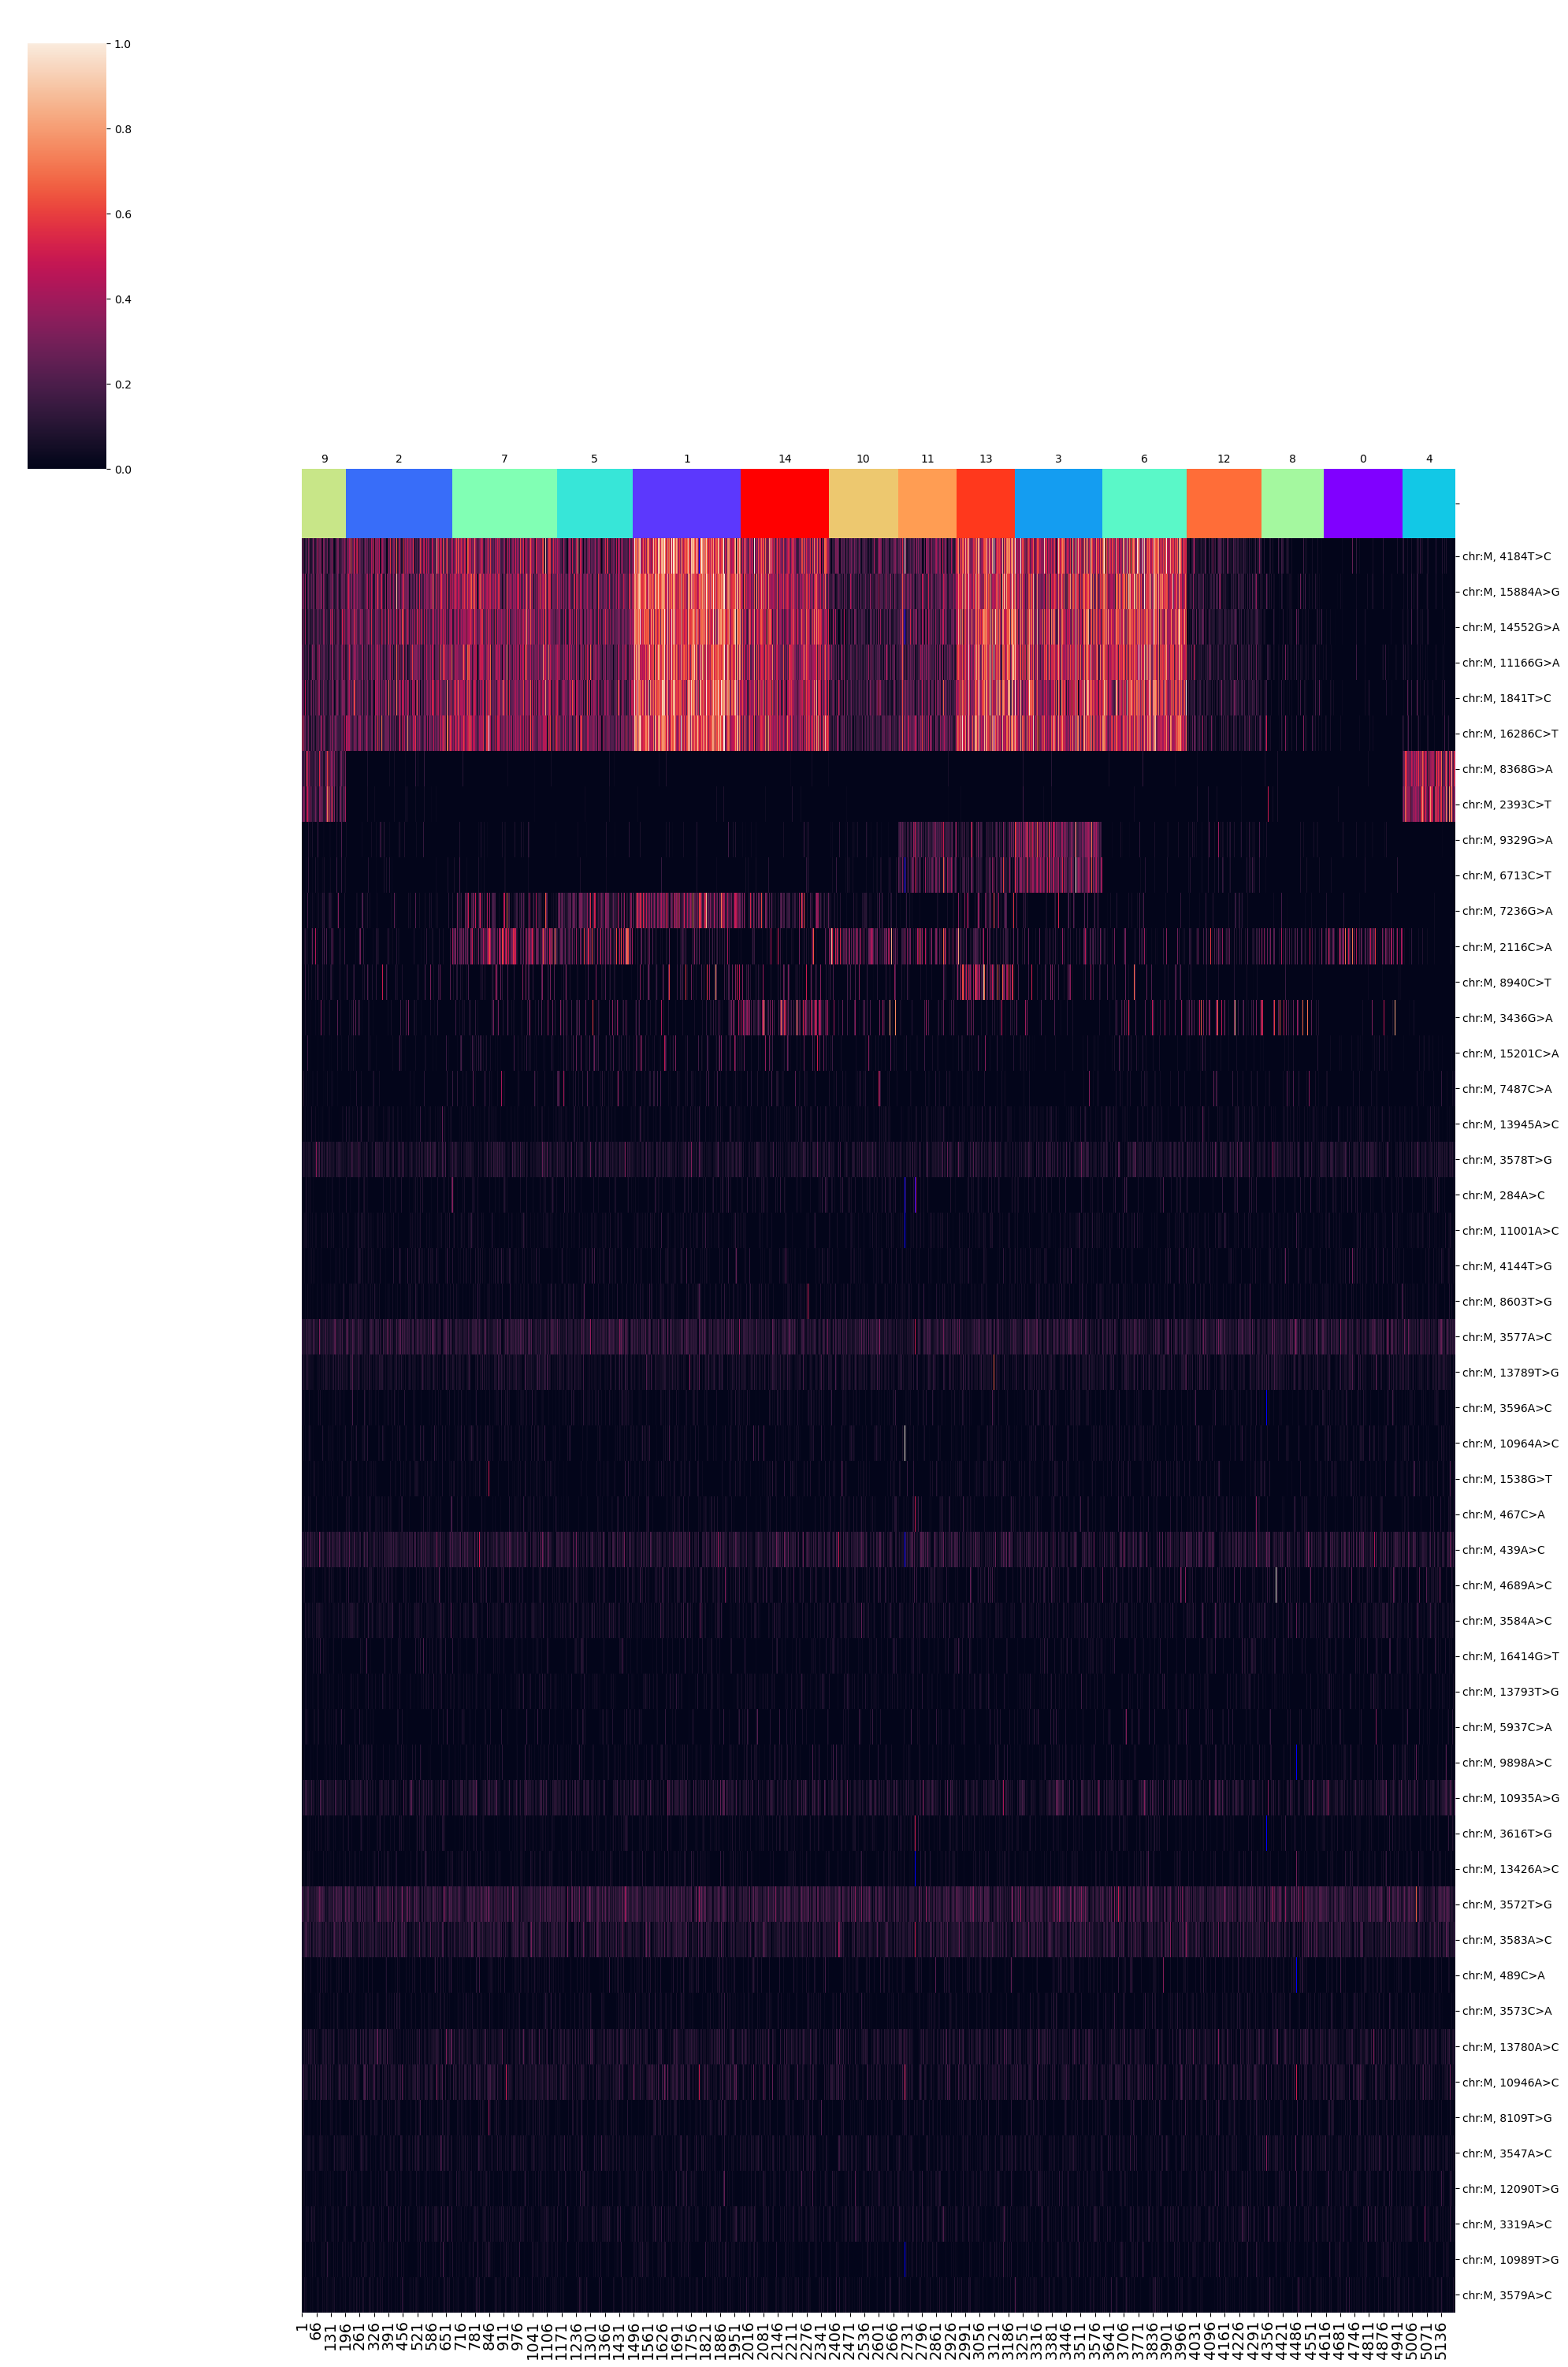

SNPs sorted by lowest p-value will be shown below


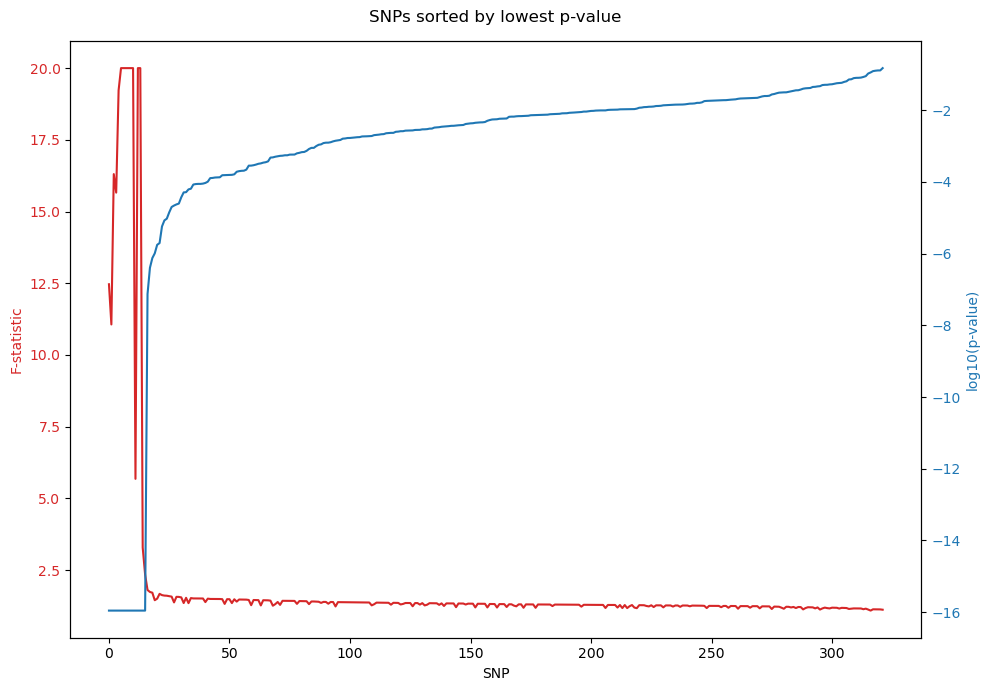

In [2]:
demo1.phylogeny(15) # number of clusters for downstream analysis

In [ ]:
# Re-display figures in higher dpi

demo1.filtering_summary(dpi = 300)
demo1.training_summary(dpi = 300)
demo1.clustering_summary(dpi = 300)
demo1.phylogeny_summary(dpi = 300)

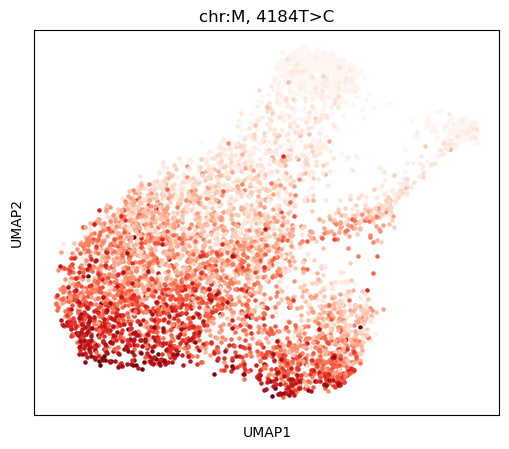

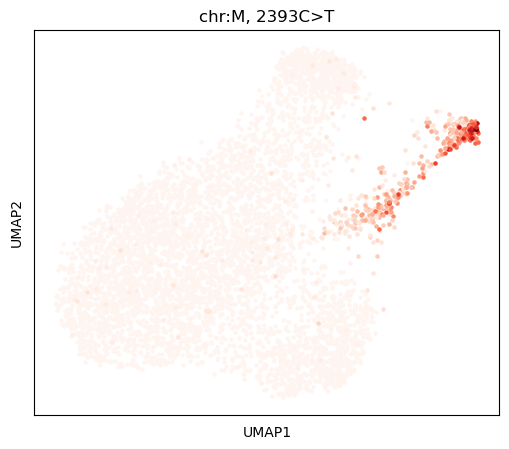

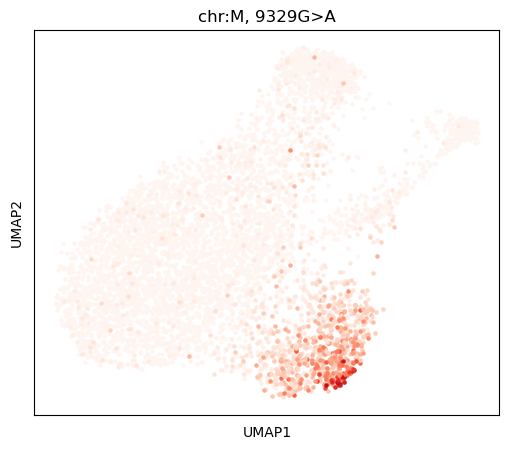

In [3]:
# Visualize frequency of particular SNPs on embeddings learnt by SNPmanifold

demo1.AF_scatter("chr:M, 4184T>C", dpi = 100)
demo1.AF_scatter("chr:M, 2393C>T", dpi = 100)
demo1.AF_scatter("chr:M, 9329G>A", dpi = 100)

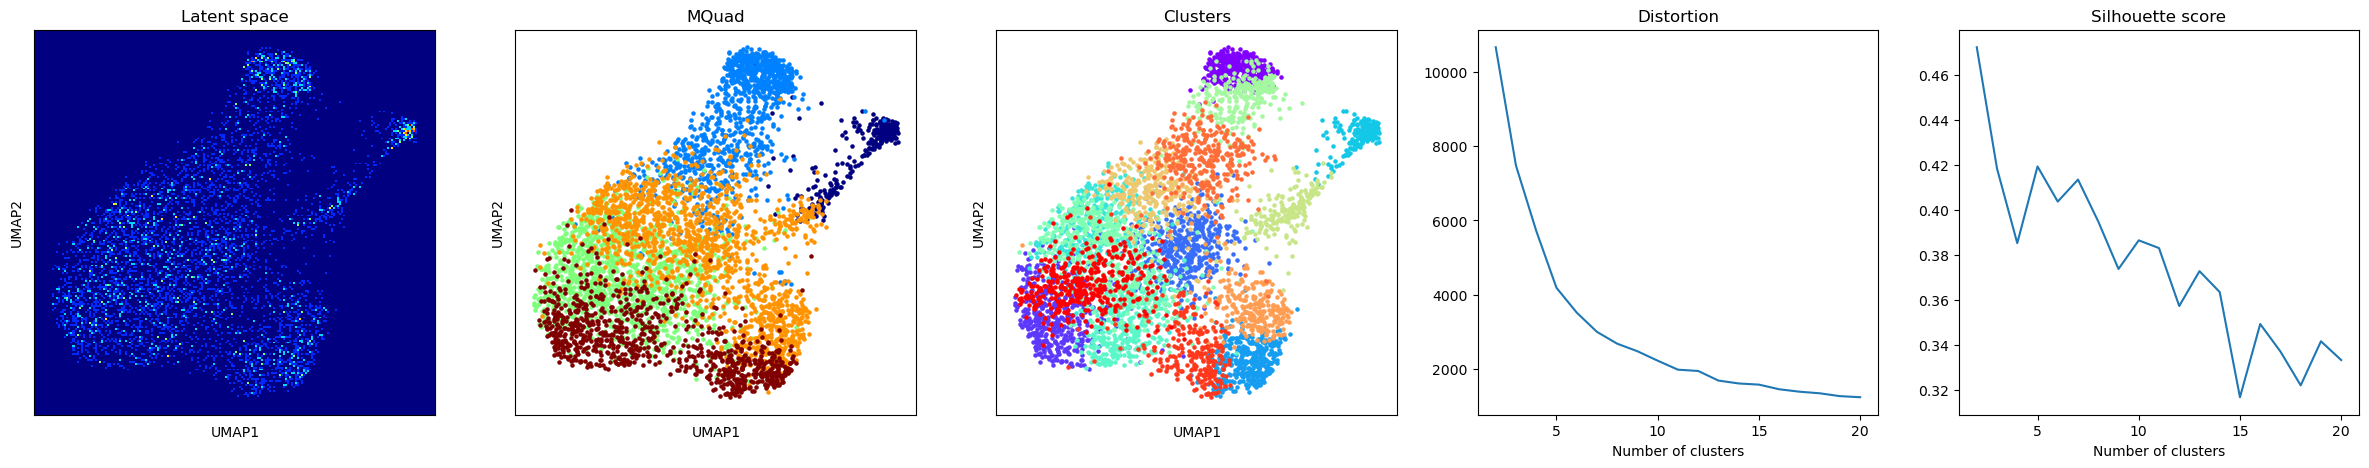

In [4]:
# Visualize cell labels assigned by another tool MQuad on embeddings learnt by SNPmanifold

import numpy as np
import matplotlib.cm as cm 
import matplotlib.pyplot as plt

filter_mkn45 = np.genfromtxt('/home/u3570318/mount2/SNPmanifold/data/MKN45_filtered/cell_filter.csv').astype(bool)
df = np.genfromtxt('/home/u3570318/mount2/SNPmanifold/data/MKN45_filtered/id.csv', delimiter = ',')[filter_mkn45]

donors = []

for h in range(5):
    
    donors.append(np.where(df == h)[0])

fig, axs = plt.subplots(1, 5)
fig.set_size_inches(30, 5)

colors = cm.jet(np.linspace(0, 1, 5))

axs[1].set_title("MQuad")

for w in range(5):
    
    axs[1].scatter(demo1.embedding_2d[donors[w], 0], demo1.embedding_2d[donors[w], 1], s = 5, color = colors[w])
    
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlabel("UMAP1")
axs[1].set_ylabel("UMAP2")

axs[0].hist2d(demo1.embedding_2d[:, 0], demo1.embedding_2d[:, 1], bins = (200, 200), cmap = plt.cm.jet \
              , range = np.array([demo1.xlim_embedding_2d, demo1.ylim_embedding_2d]))
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("Latent space")
axs[0].set_xlabel("UMAP1")
axs[0].set_ylabel("UMAP2")

axs[2].set_title("Clusters")

for w in range(15):
    
    axs[2].scatter(demo1.embedding_2d[demo1.clusters[w], 0], demo1.embedding_2d[demo1.clusters[w], 1] \
                   , s = 5, color = demo1.colors[w])
    
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_xlabel("UMAP1")
axs[2].set_ylabel("UMAP2")

axs[3].plot(np.arange(2, 21), demo1.distortions)
axs[3].set_title("Distortion")
axs[3].set_xlabel("Number of clusters")    
axs[3].set_xticks([5, 10, 15, 20])
axs[4].set_title("Silhouette score")
axs[4].set_xlabel("Number of clusters")
axs[4].set_xticks([5, 10, 15, 20])
axs[4].plot(np.arange(2, 21), demo1.scores)

plt.show()